In [41]:
# dataframe libs
import pandas as pd
import numpy as np

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# status bar lib
import tqdm

In [42]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### DATA DICTIONARY
- crim: per capita crime rate by town
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- rm: average number of rooms per dwelling
- age: proportion of owner-occupied units built prior to 1940
- tax: full-value property-tax rate per 10,000 dollars
- ptratio: pupil/teacher ratio by town
- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- median_home_value: median value of owner-occupied homes
- sales: the average sales by month in the given county
- county_id: the unique identifier of the county in which the store is operating

In [43]:
data = pd.read_csv("existing.csv")

In [44]:
data.shape

(7432, 14)

In [45]:
# view first five rows of dataset
data.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales,county_id
0,0.126850,0.000000,10.052747,6.605513,83.852872,398.095958,19.921367,399.247329,2174,531,197115,43691,45525.72,29273
1,6.948668,2.575345,13.587802,6.058499,71.853423,489.455895,18.410891,329.575330,1632,415,208099,52122,40847.65,20333
2,1.106052,19.060291,14.479209,8.135461,74.923176,341.988287,14.547811,422.322861,432,97,496293,116827,29130.24,20337
3,0.228808,5.074005,5.946199,6.379816,75.332827,301.541124,16.145675,391.121575,2341,602,241825,58209,41263.08,8035
4,2.365234,7.291047,13.035502,5.989832,46.900638,403.151512,18.837390,363.936595,3610,966,214144,47867,45233.83,24593


In [46]:
# check for missing values
data.isnull().sum()

crim                 0
zn                   0
indus                0
rm                   0
age                  0
tax                  0
ptratio              0
black                0
population           0
families             0
median_home_value    0
median_income        0
sales                0
county_id            0
dtype: int64

The fact that we have all 0s means there is no missing data. Cleaning data is an important part of machine learning but will not be covered here.

In [47]:
# view how pandas is reading each column's data type
data.dtypes

crim                 float64
zn                   float64
indus                float64
rm                   float64
age                  float64
tax                  float64
ptratio              float64
black                float64
population             int64
families               int64
median_home_value      int64
median_income          int64
sales                float64
county_id              int64
dtype: object

In [48]:
# summary of the metadata
data.describe()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales,county_id
count,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000,7432.000000
mean,3.772483,11.129333,11.065441,6.297828,70.377116,404.052943,18.396581,356.185581,3068.596878,791.905409,227688.736545,58312.731701,42158.730592,14780.409849
std,7.779593,16.860145,5.926543,0.744132,22.334313,141.664945,2.164231,73.847485,7523.174688,1976.069391,92545.905262,28385.727083,4248.066902,8380.588813
min,0.011021,0.000000,1.062038,3.503176,6.679494,151.018897,10.837617,2.754032,99.000000,24.000000,50285.000000,9513.000000,28600.180000,111.000000
25%,0.158442,0.000000,5.812698,5.823247,52.478288,292.427391,16.969242,346.373838,671.750000,171.000000,173162.000000,38379.500000,40050.500000,7542.250000
50%,0.750497,2.264277,10.251853,6.208356,74.060175,354.031377,18.620381,379.519848,1339.000000,341.000000,211357.500000,52739.500000,42607.740000,14755.500000
75%,4.283231,18.200273,16.578773,6.700987,89.126271,507.909445,19.972947,396.408006,2599.000000,656.250000,260454.000000,71103.750000,44932.460000,22093.750000
max,80.091252,98.649315,32.914894,10.463792,122.863357,868.278654,26.042857,509.940068,81998.000000,19765.000000,605425.000000,202291.000000,58175.680000,29299.000000


C:\Users\kiran\AppData\Local\Temp\ipykernel_26408\1715658358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sales'])


<Axes: xlabel='sales', ylabel='Density'>

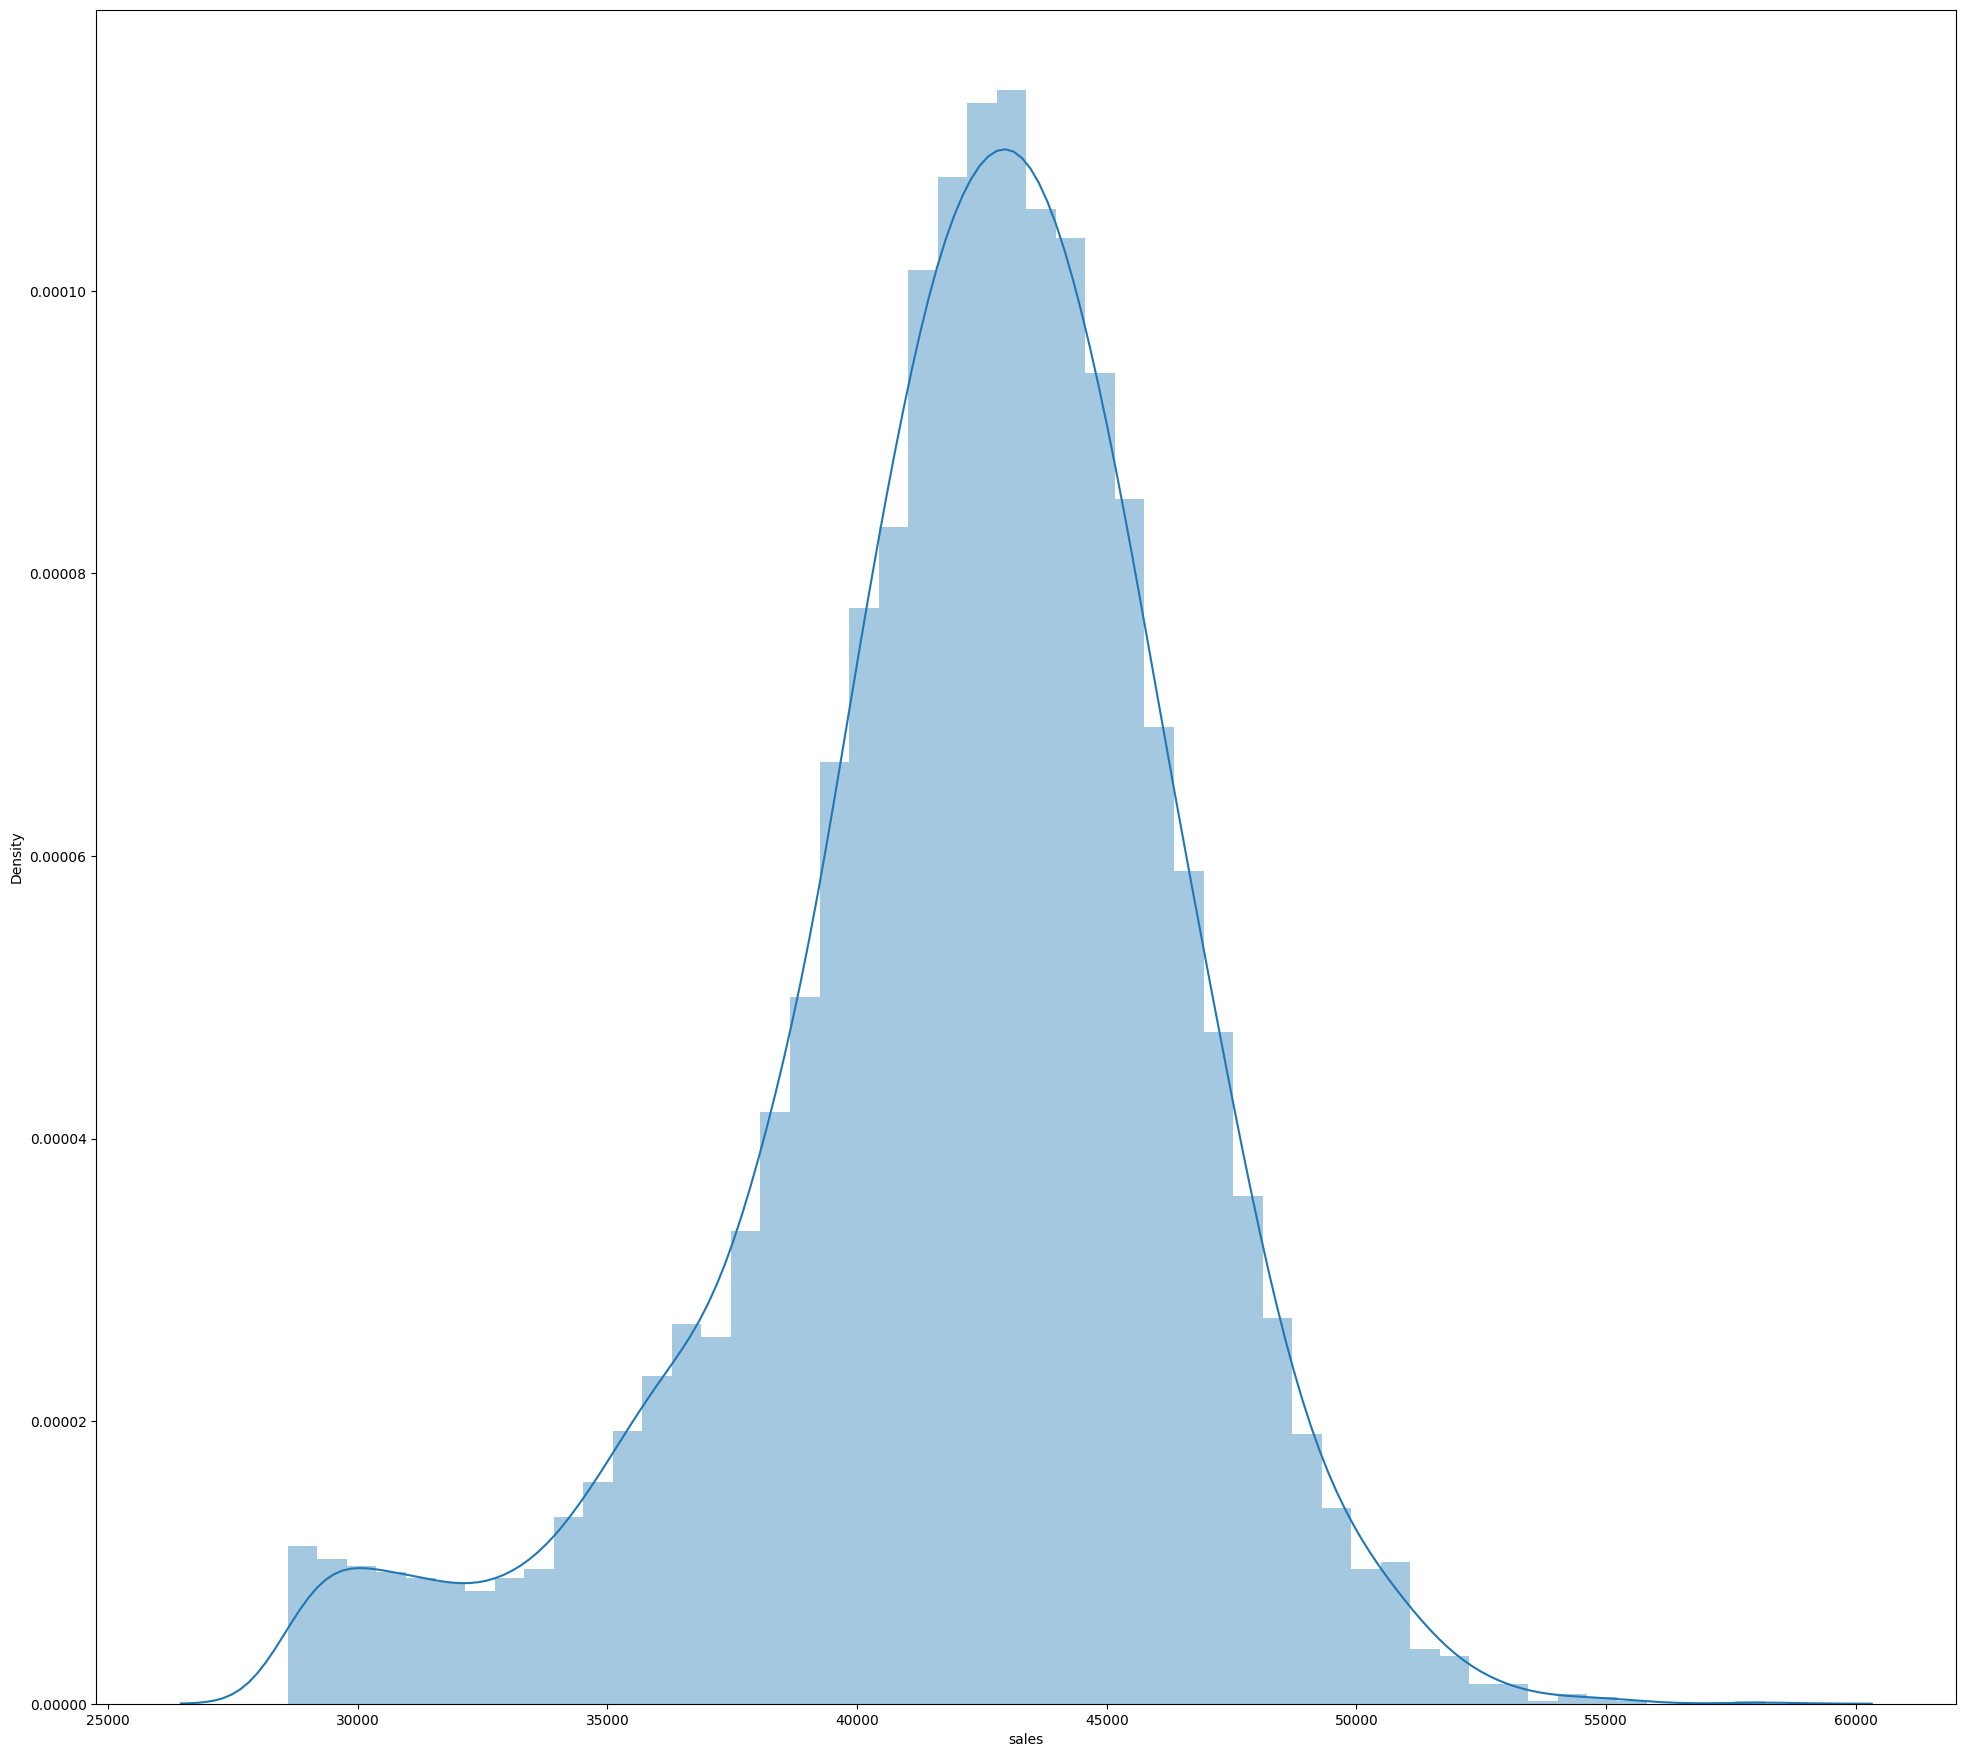

In [49]:
sns.distplot(data['sales'])

The sales variable is basically normally distributed, but its left tail seems to exhibit a hitch. We will try making predictions with several techniques to see which one(s) deals best with the non-normality in the distribution. The predicted variable (otherwise known as the dependent variable) will not always be normally distributed, but when it is, it is easier to model usually. How easy it is to model also depends on the quality of the inputs.

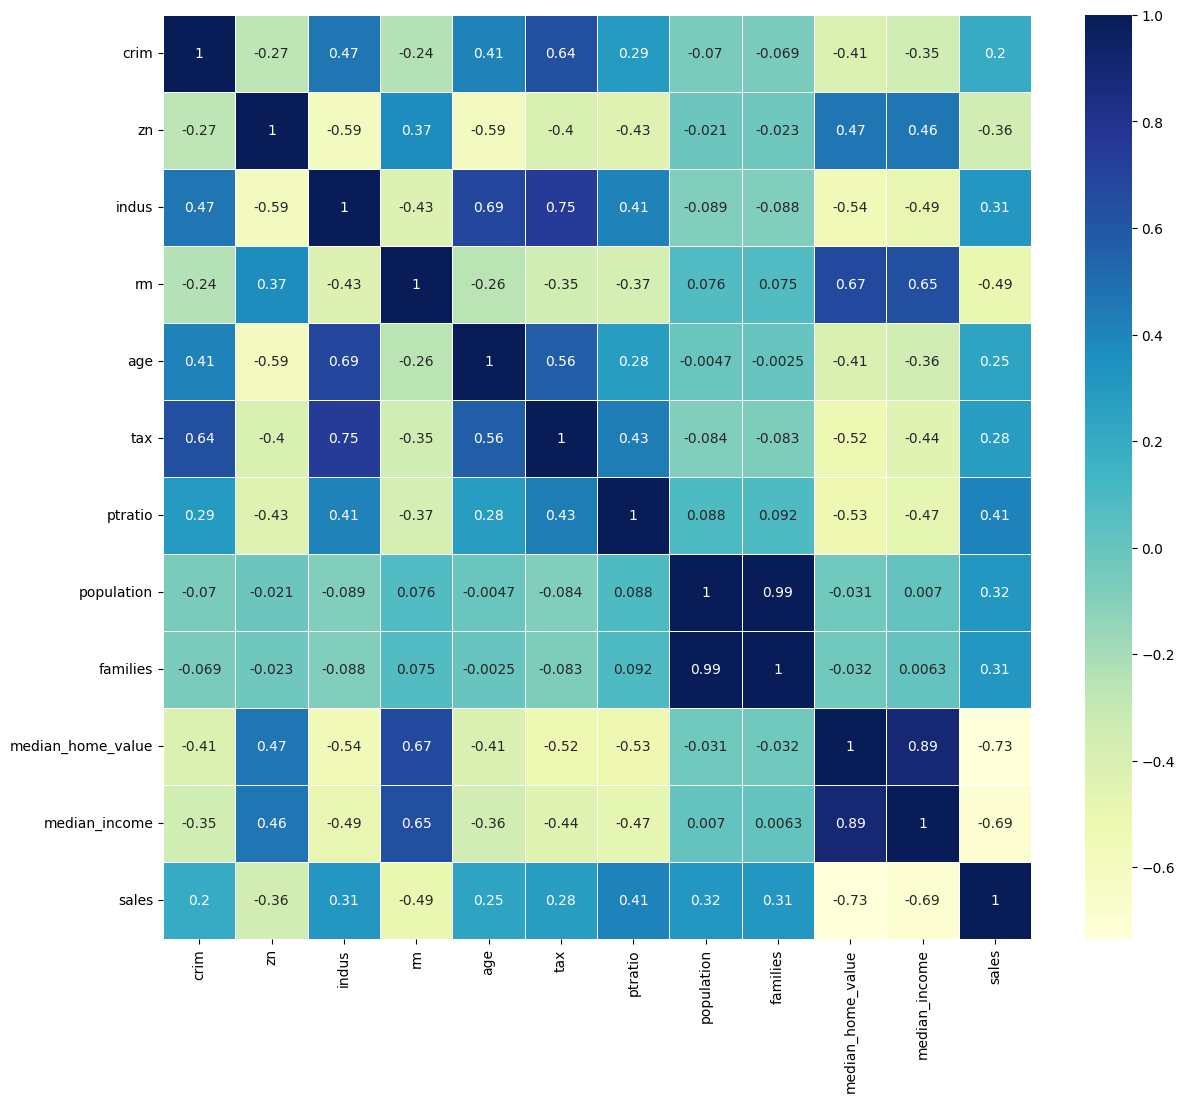

In [50]:
# view correlation coefficients from each column with one another
# omit some of the variables we already know we won't use
corrMatrix = data[['crim','zn','indus','rm','age','tax','ptratio','population','families','median_home_value','median_income','sales']].corr()

plt.rcParams["figure.figsize"] = (14,12)
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

Some interesting observations:
1. families and population are very highly correlated. Because population is slightly more highly correlated with sales, we will keep that variable and omit families. We don't want variables that are that highly correlated with one another because it can confuse our predictions.
2. median_home_value and median_income are also highly correlated, but not as much. We could justify dropping one of these as well, but we have enough data to keep both of them.
3. median_home_value and median_income are both highly negatively correlated with sales. The data suggests that our business does not do as well in high-income areas. There could be opportunities to make more high-end products in those areas to see if some of that can be mitigated.

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'rm'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'black'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'families'}>,
        <Axes: title={'center': 'median_home_value'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'sales'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

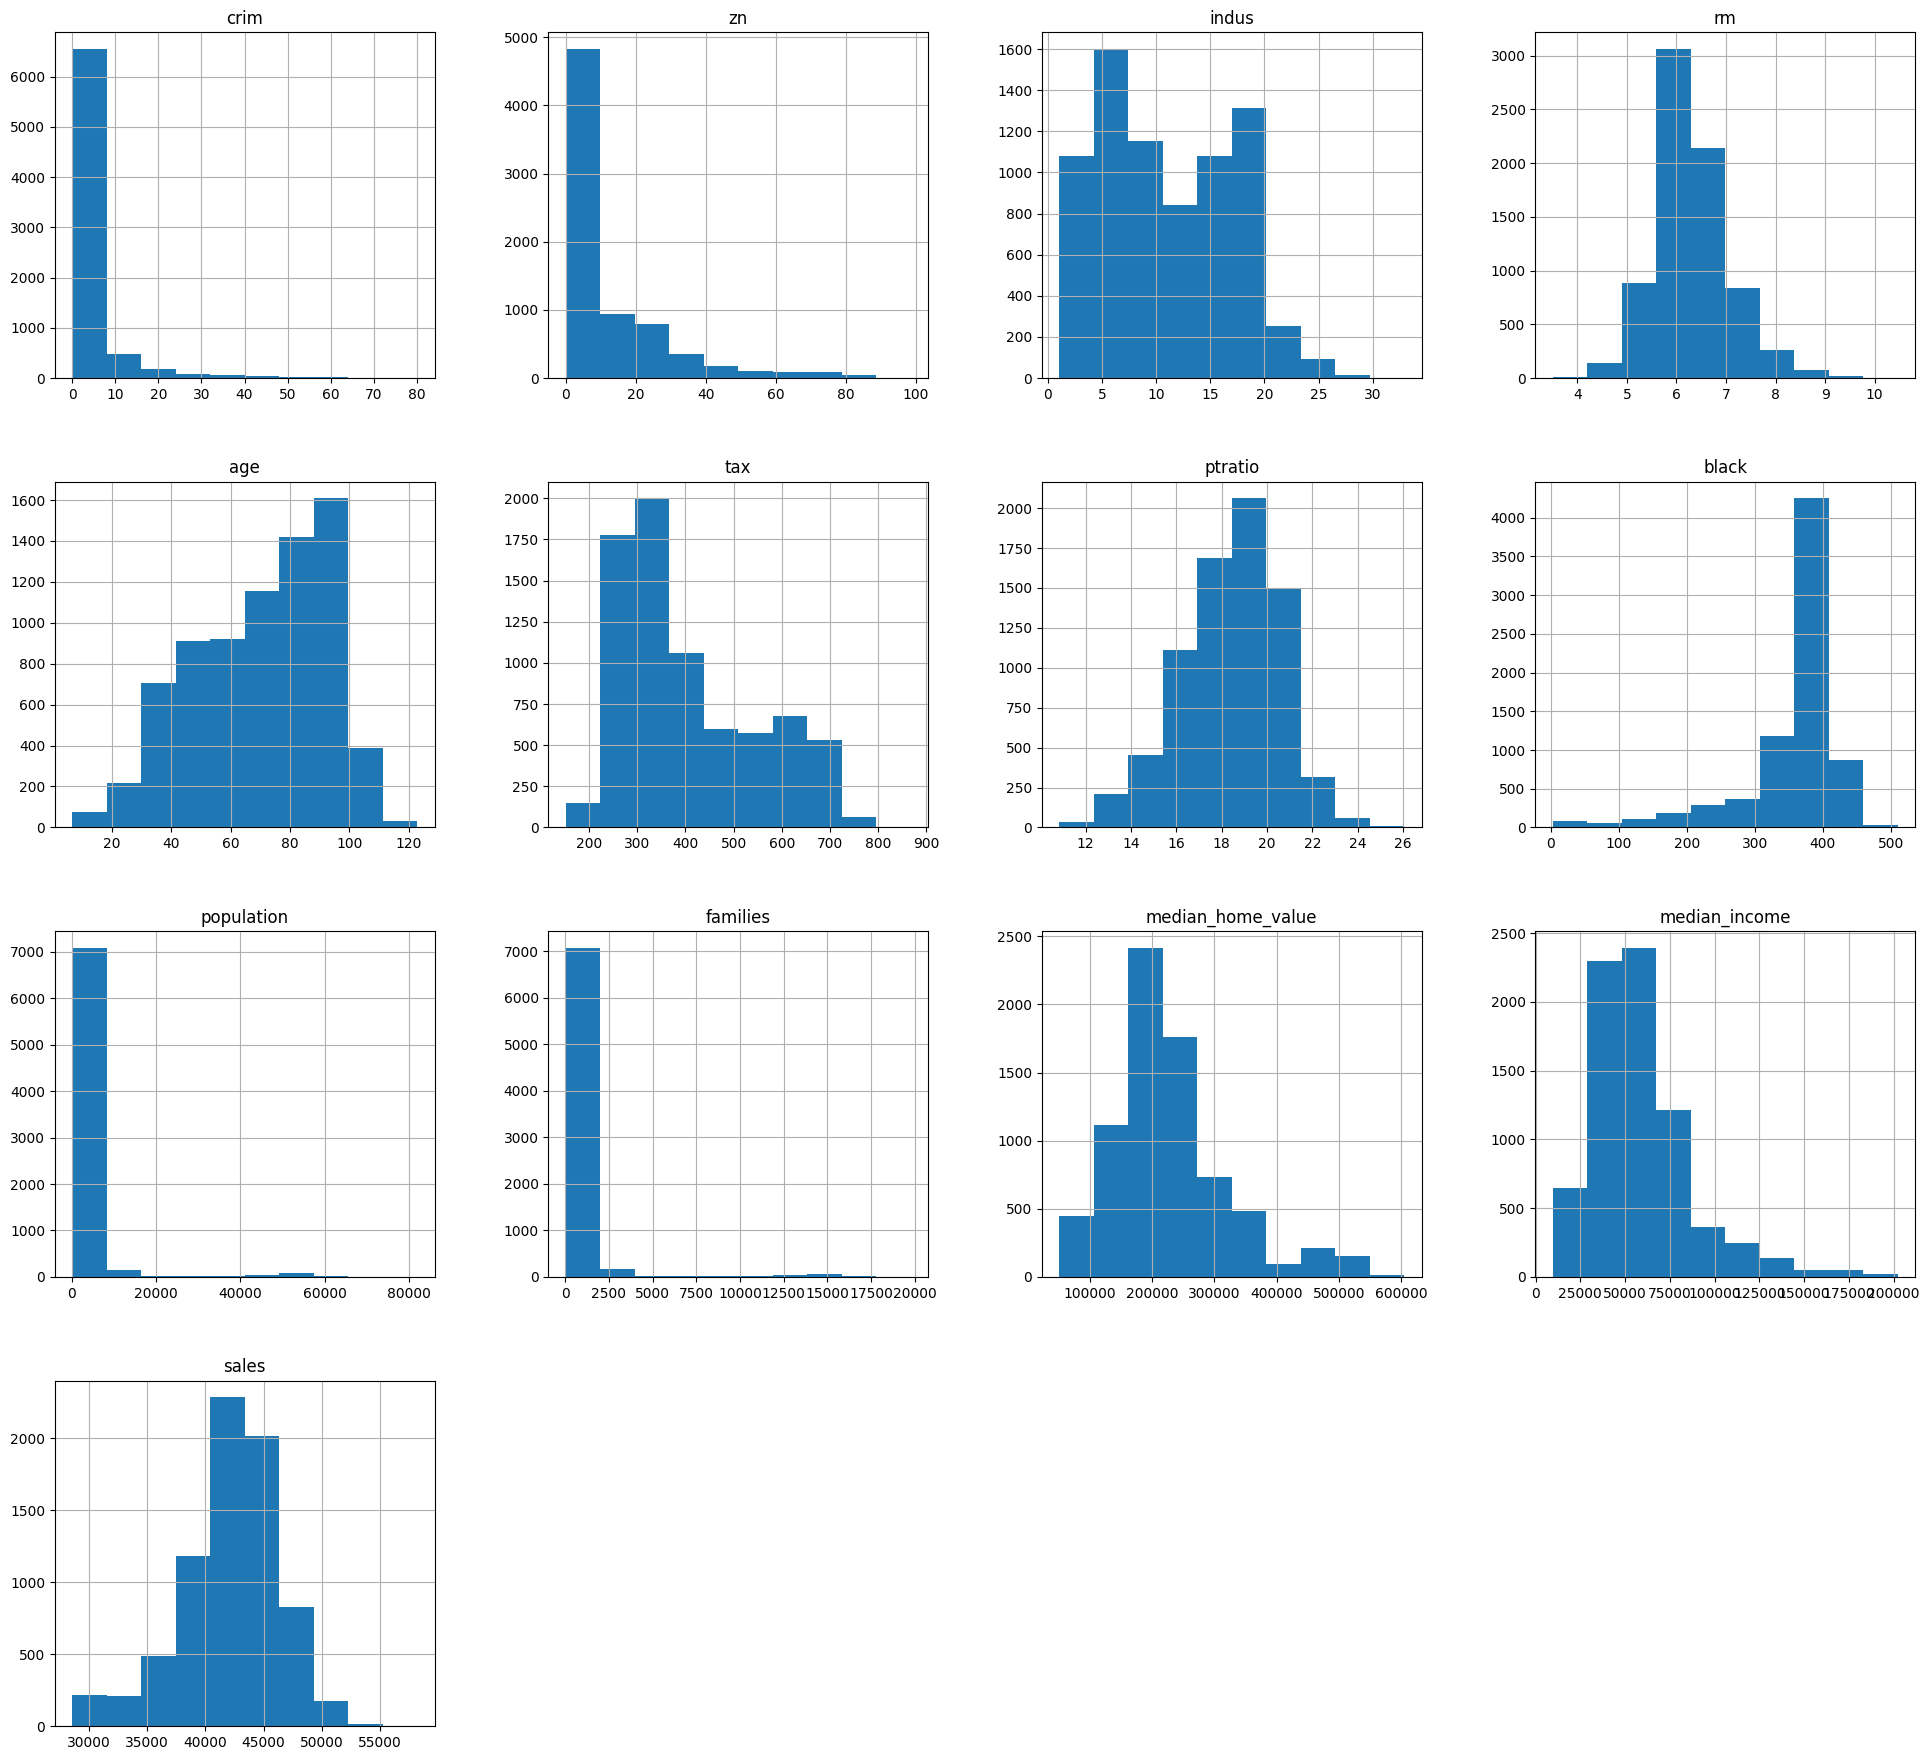

In [51]:
# view distributions of variables
plt.rcParams["figure.figsize"] = (24,22)
data.drop(columns='county_id').hist()

Some interesting observations:
1. The distribution of population is highly skewed right. To normalize highly skewed-right variables, we can perform tranformations. In the case of population, taking the natural log will help normalize this distribution and make it easier to model.
3. We may want to try the same for zn but crim to see if it materially affects the models, but we have to also be careful to not perform logorithmic applicaitons on variables that could have 0 as a possible value. Transforming all variables is not critical but we should at least consider it, especially for variables that we think could be highly correlated with the dependent variable.
4. With median_home_value, we can theorize a kind of non-linear relationship between it and sales, and adding a quadratic term could account for that non-linearity.
5. median_income is slightly skewed right. Instead of using a logarithmic transformation since it's not as highly skewed as population, we can take its square root to make it slightly more normal.
6. There are several other transformations we could try applying, such as one-hot encoding and creating interactions (multiplying two variables together).

In [52]:
# a basic data pipeline for processing new data to make predictions on, based on decisions made from our data exploration
# there are more sophisticated ways to do this, but our data is pretty clean so this basic function is fine
def pipe(df):
    data = df.copy()
    data['log_population'] = np.log(data['population']) # to normalize population's distribution
    data['median_home_value_sq'] = data['median_home_value']**2 # to account for diminishing returns in home value
    data['median_income_sqrt'] = np.sqrt(data['median_income']) # to normalize the distribution
    return data.drop(columns=['population','median_income','black','families','county_id'])



In [53]:
data = pipe(data)

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>],
       [<Axes: title={'center': 'rm'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'median_home_value'}>,
        <Axes: title={'center': 'sales'}>],
       [<Axes: title={'center': 'log_population'}>,
        <Axes: title={'center': 'median_home_value_sq'}>,
        <Axes: title={'center': 'median_income_sqrt'}>]], dtype=object)

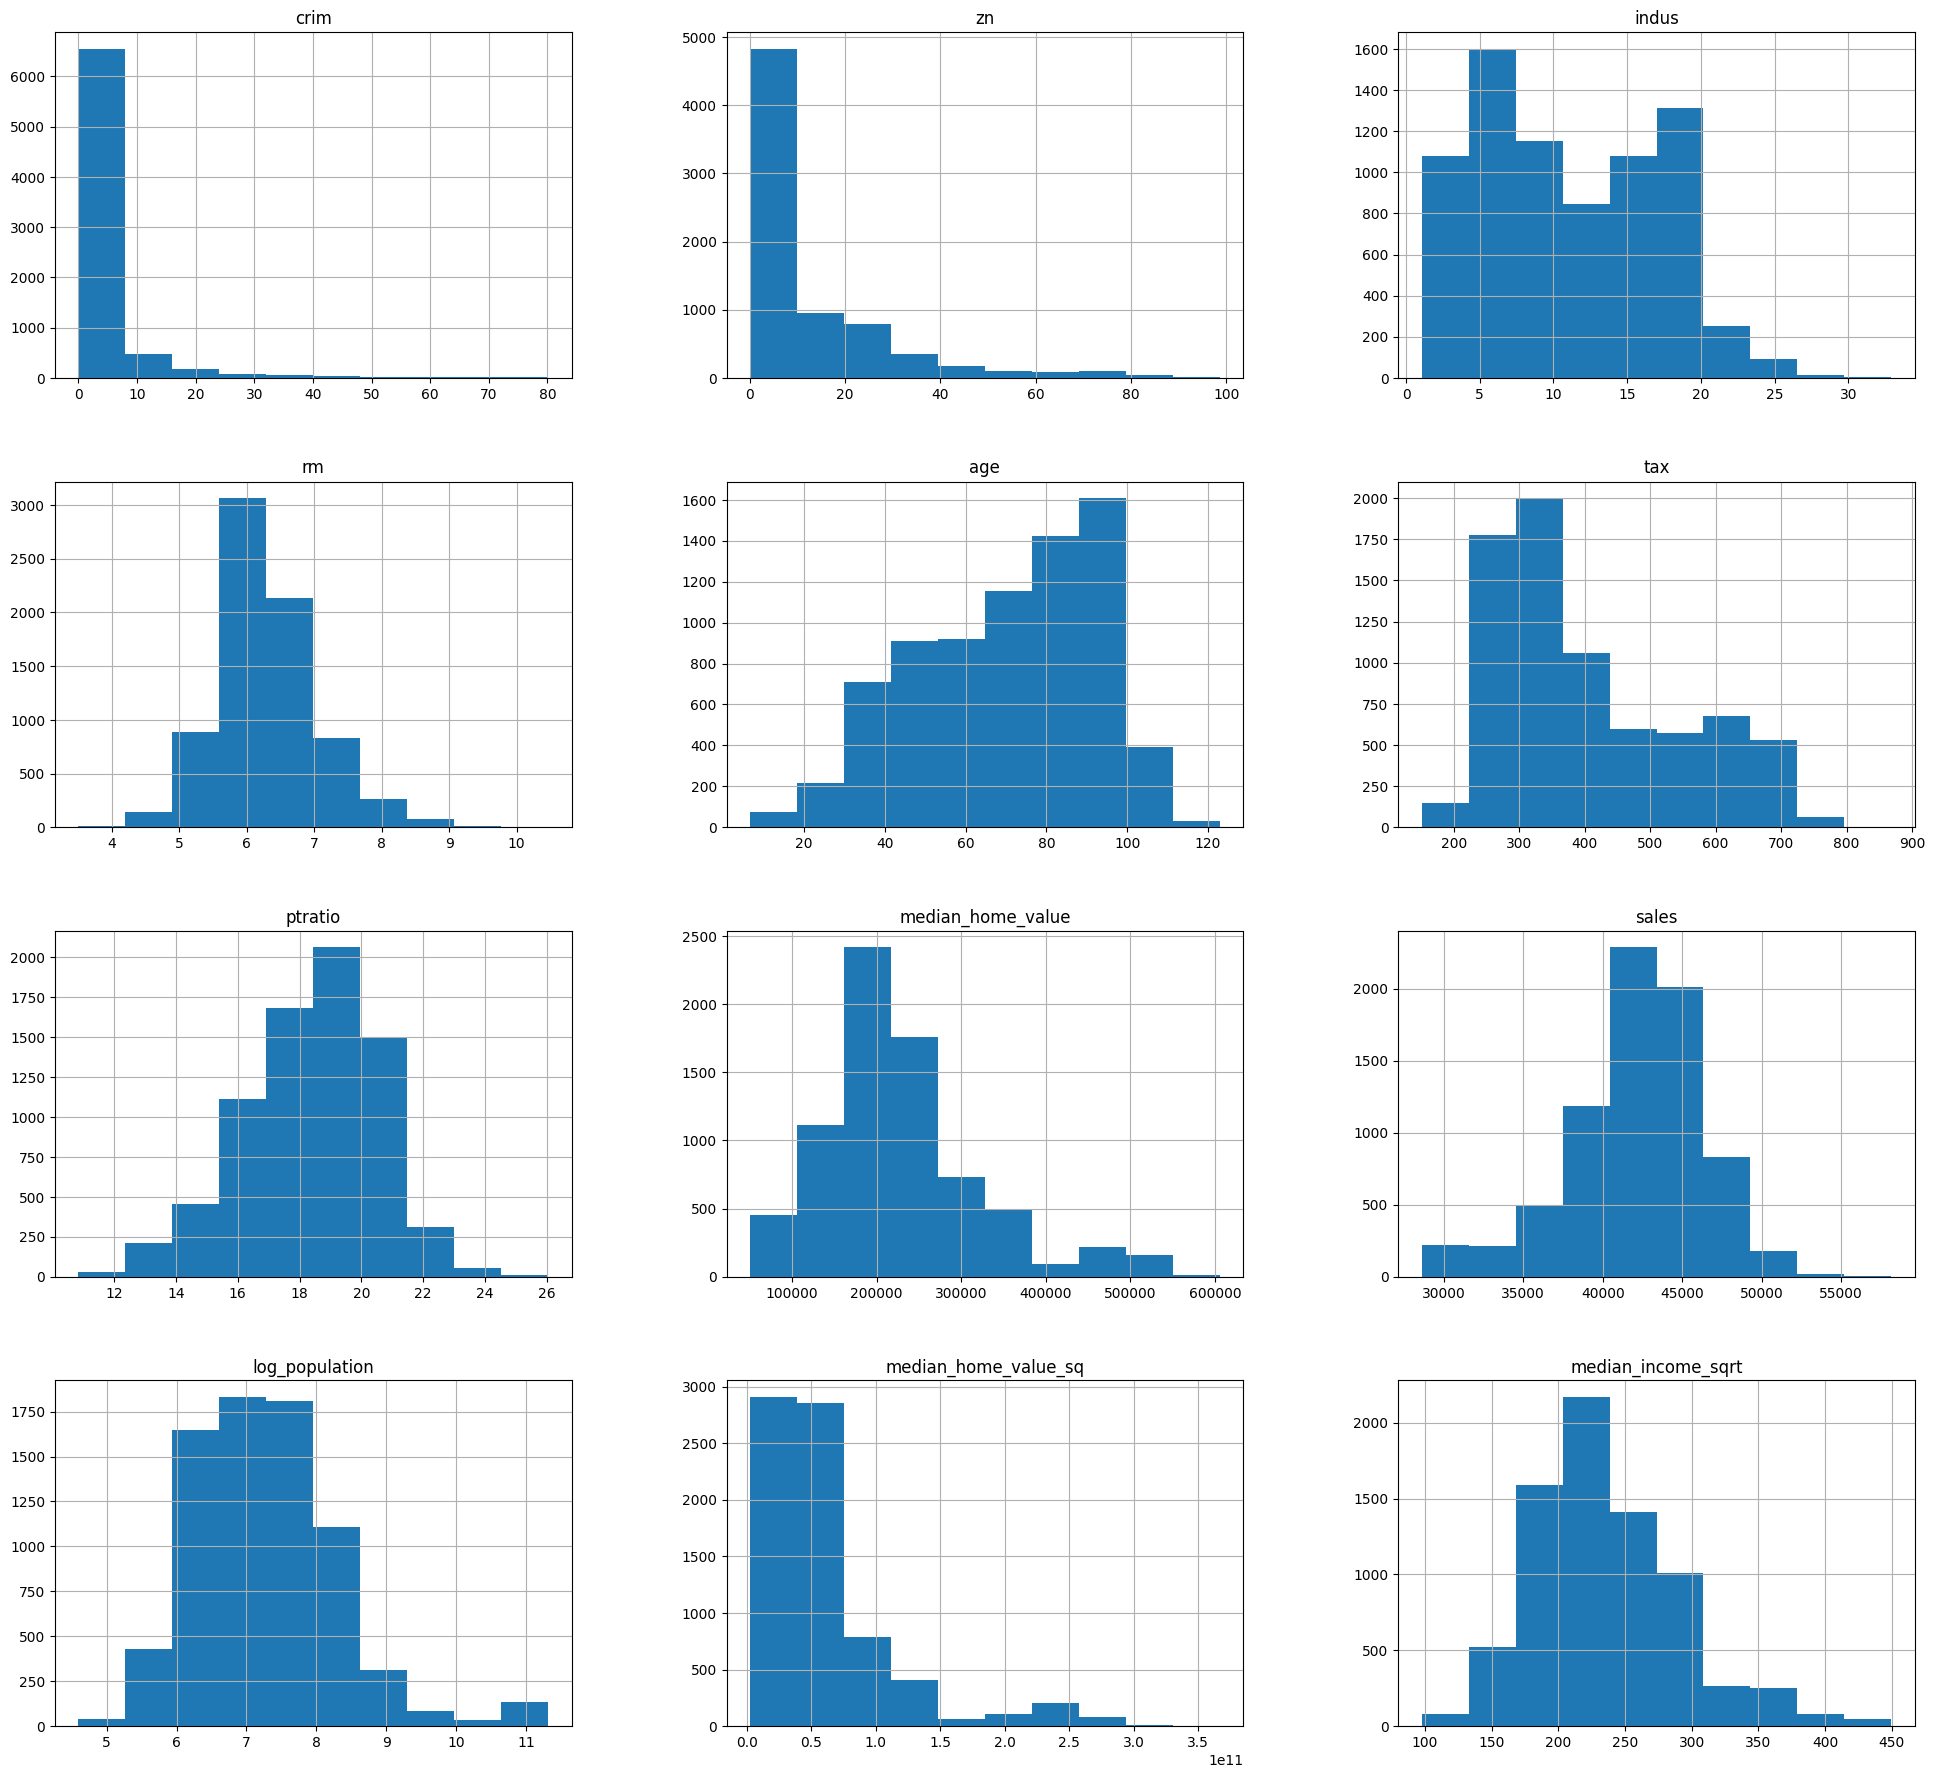

In [54]:
# view distributions of variables after transformations
plt.rcParams["figure.figsize"] = (24,22)
data.hist()

In [55]:
# view processed dataset
data.head()

,crim,zn,indus,rm,age,tax,ptratio,median_home_value,sales,log_population,median_home_value_sq,median_income_sqrt
0,0.126850,0.000000,10.052747,6.605513,83.852872,398.095958,19.921367,197115,45525.72,7.684324,38854323225,209.023922
1,6.948668,2.575345,13.587802,6.058499,71.853423,489.455895,18.410891,208099,40847.65,7.397562,43305193801,228.302431
2,1.106052,19.060291,14.479209,8.135461,74.923176,341.988287,14.547811,496293,29130.24,6.068426,246306741849,341.799649
3,0.228808,5.074005,5.946199,6.379816,75.332827,301.541124,16.145675,241825,41263.08,7.758333,58479330625,241.265414
4,2.365234,7.291047,13.035502,5.989832,46.900638,403.151512,18.837390,214144,45233.83,8.191463,45857652736,218.785283


## Split Data
**Section Goals**
1. Create a random split in dataset
2. Set random seed for repeatability

In [56]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'sales']
y = data.loc[:, data.columns == 'sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20)

## Explore Data Relationships with Linear Regression
**Section Goals**
1. Create a multivariate linear model of sales
2. Interpret estimated coefficients magnitude, direction
3. Determine which variables are statistically significant in our model

Since this is the simplest model we will run, it is also the easiest to interpret. Many times, we make a linear model and call it the model to beat. Our goal will be to use more sophisticated techniques to outclass this simple model.

In [58]:
import statsmodels.api as sm

X_train['intercept'] = 1
lm = sm.OLS(y_train,X_train)
lr_results = lm.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1415.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:03:56   Log-Likelihood:                -50760.
No. Observations:                5574   AIC:                         1.015e+05
Df Residuals:                    5562   BIC:                         1.016e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
crim                    -7.0494      5.192     -1.358      0.175     -17.228       3.130
zn                       2.6530      2.437      1.088      0.276      -2.125       7.431
indus                   -1.3673      9.360     -0.146      0.884     -19.716      16.982
rm                    -188.8221     54.407     -3.471      0.001    -295.482     -82.162
age                      5.5631      2.030      2.740      0.006       1.583       9.543
tax                     -1.4438      0.379     -3.807      0.000      -2.187      -0.700
ptratio                 28.7541     17.162      1.675      0.094      -4.890      62.398
median_home_value       -0.0118      0.002     -5.384      0.000      -0.016      -0.007
log_population        1705.3080     29.606     57.601      0.000    1647.269    1763.347
median_home_value_sq  -2.45e-08   3.22e-09     -7.618      0.000   -3.08e-08   -1.82e-08
median_income_sqrt     -13.1787      1.227    -10.739      0.000     -15.585     -10.773
intercept             3.787e+04    642.578     58.941      0.000    3.66e+04    3.91e+04
==============================================================================
Omnibus:                       32.561   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.610
Skew:                           0.157   Prob(JB):                     3.05e-08
Kurtosis:                       3.223   Cond. No.                     1.77e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How to interpret output:**
1. An estimated coefficeint value (found in the "coef" column) answers this question: Given a one-unit change in the variable's value, how do we expect the depdendent variable to change in response, holding all other factors constant?
  - For example, looking at the estimated coefficient for age, we expect a one unit change in its value to account for about 5.60 extra in sales per month, all else held equal.
2. For logged variables, we say a one percent change in the value of the independent variable changes the value of the dependent variable by the amount of the estimated coefficient.
  - For example, as population increases by one percent, we expect sales to incrase by about 1,700, all else held equal
3. Statistical significance can be read from the estiamted coefficient's p-value (the column labled "P>|t|")
4. All p-values less than 0.05 denote that a given variable is significant at the 95% confidence level--we are 95% confident that the variable has some influence on the predicted outcome, or at the very least, the two variables move together, all else held constant.
5. A p-value less than 0.01 is siginficant at the 99% level, less than 0.1 at the 90% level, and so forth.
6. The significant variables in this model (at the 95% confidence level) are rm, age, tax, median_home_value, log_population, median_home_value_sq, median_income_sqrt, and the intercept.
7. The intercept is what we expect the dependent variable's value to be if all independent variables in the model are 0--the intercept doesn't always have a meaningful value and is usually only present to make the model fit better.
7. Just because a variable is statistically insignificant does not mean we want to drop it. Statistically insignificant variables can still have some effect on the outcome even if we don't have enough evidence to prove it. Choosing features to include in a model is an iterative and oftentimes long process.

## Normalize data
[Back to top](#Machine-Learning-with-Regression-in-Python)  

**Section Goals**
1. Normalize all x variables so that new_value_i = (old_value_i - mean(old_value))/std(old_value)
    - This functionally means that each value will have mean of 0 and its unit will be in terms of standard deviations from its true mean
    - Not necessary for every modeling application, but can improve performance and make visualizations easier-to-understand

In [59]:
# we need to drop the intercept variable we created for the sm model since sklearn adds it automatically
X_train.drop(columns='intercept',inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler

# normalize traning set
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# normalize test set
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# X_train and X_test are now numpy ndarray objects. X is still a pandas dataframe